[video link](https://www.youtube.com/watch?v=7O4dpR9QMIM&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t&index=5)

## Upload the data

Imports necessary libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

upload the data

In [68]:
df = pd.read_csv("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv", index_col=0, header=[0, 1])

In [69]:
# choose relevant columns
df.columns.tolist()


[('Job_details', 'Title'),
 ('Job_details', 'Description'),
 ('Job_details', 'Is_contract'),
 ('Job_details', 'Seniority'),
 ('Job_details', 'City'),
 ('Job_details', 'State'),
 ('Job_details', 'Country'),
 ('Job_details', 'Region'),
 ('Job_details', 'Job_age'),
 ('Job_details', 'Easy_apply'),
 ('Salary', 'Min'),
 ('Salary', 'Max'),
 ('Salary', 'Avg'),
 ('Salary', 'Currency'),
 ('Salary', 'Employer_provided'),
 ('Salary', 'Is_hourly'),
 ('Salary', 'Specified'),
 ('Company_info', 'Name'),
 ('Company_info', 'Rating'),
 ('Company_info', 'Employees'),
 ('Company_info', 'Type_of_ownership'),
 ('Company_info', 'Sector'),
 ('Company_info', 'Industry'),
 ('Company_info', 'Company_age'),
 ('Company_info', 'Revenue_USD'),
 ('Company_info', 'Friend_recommend'),
 ('Company_info', 'CEO_approval'),
 ('Company_info', 'Career_opportunities'),
 ('Company_info', 'Comp_&_benefits'),
 ('Company_info', 'Senior_management'),
 ('Company_info', 'Work/Life_balance'),
 ('Company_info', 'Culture_&_values'),
 ('C

### Select the relevant data 

In [70]:
df_model = pd.DataFrame()

columns_to_move = [
    ('Job_details', 'Country'),
    ('Job_details', 'Seniority'),
    ('Job_details', 'Job_age'),
    ('Salary', 'Avg'),
    ('Salary', 'Employer_provided'),
    ('Salary', 'Is_hourly'),
    ('Company_info', 'Rating'),
    ('Company_info', 'Employees'),
    ('Company_info', 'Type_of_ownership'),
    ('Company_info', 'Sector'),
    ('Company_info', 'Company_age'),
    ('Company_info', 'Revenue_USD'),
    ('Programming_languages', 'SQL'),
    ('Programming_languages', 'Python'),
    ('Programming_languages', 'Java'),
    ('Programming_languages', 'Scala'),
    ('Cloud_platforms', 'Microsoft_Azure'),
    ('Cloud_platforms', 'AWS'),
    ('Cloud_platforms', 'GPC'),
    ('Data_integration_and_processing', 'Databricks'),
    ('Search_&_Analytics', 'Snowflake'),
    ('Stream_processing_tools', 'Apache_Kafka'),
    ('Big_Data_processing', 'Apache_Spark')
]

extracted_columns = df.loc[:, columns_to_move]

extracted_columns.columns = extracted_columns.columns.droplevel(0)

extracted_columns = extracted_columns.rename(columns={'Avg': 'Salary_avg'})

df_model[extracted_columns.columns] = extracted_columns

df_model.columns


Index(['Country', 'Seniority', 'Job_age', 'Salary_avg', 'Employer_provided',
       'Is_hourly', 'Rating', 'Employees', 'Type_of_ownership', 'Sector',
       'Company_age', 'Revenue_USD', 'SQL', 'Python', 'Java', 'Scala',
       'Microsoft_Azure', 'AWS', 'GPC', 'Databricks', 'Snowflake',
       'Apache_Kafka', 'Apache_Spark'],
      dtype='object')

In [71]:
bi_subcolumns = df['Business_Intelligence_Tools'].columns

is_true = df['Business_Intelligence_Tools'][bi_subcolumns].any(axis=1)
df_model['BI_Tools'] = is_true.astype(bool)

In [72]:
# better get any estimation than none, even if model is not so accurate
df_model = df_model.dropna(subset=['Salary_avg'])

In [73]:
len(df_model)

742

In [74]:
# To avoid bugs with infinitive values
df_model = df_model.fillna(-1)

## Get dummy data

Transforms categorical variables into numerical form by creating binary indicator variables for each category, resulting in a new DataFrame called 'df_dum'

In [75]:
df_dum = pd.get_dummies(df_model)

In [76]:
df_dum.columns

Index(['Job_age', 'Salary_avg', 'Employer_provided', 'Is_hourly', 'Rating',
       'Company_age', 'SQL', 'Python', 'Java', 'Scala', 'Microsoft_Azure',
       'AWS', 'GPC', 'Databricks', 'Snowflake', 'Apache_Kafka', 'Apache_Spark',
       'BI_Tools', 'Country_Australia', 'Country_Austria', 'Country_Belgium',
       'Country_Canada', 'Country_Czech Republic', 'Country_Denmark',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Hong Kong', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_New Zealand', 'Country_Poland',
       'Country_Portugal', 'Country_Romania', 'Country_Singapore',
       'Country_Spain', 'Country_Sweden', 'Country_Switzerland',
       'Country_United Kingdom', 'Country_United States', 'Seniority_-1',
       'Seniority_Junior', 'Seniority_Management', 'Seniority_Mid',
       'Seniority_Senior', 'Employees_-1', 'Employees_1 to 50',
       'Employees_10000+', 'Employees_1001 to 5000', 'Employees_201 to 500',
       '

## Train the split
Splits the data into two separate datasets, one for training the model and the other for testing its performance, using the train_test_split function from scikit-learn.

In [77]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Salary_avg', axis =1)
y = df_dum['Salary_avg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
my_xnames = X.columns

new_index = pd.Index(["Salary_avg"])

my_xnames = pd.Index(new_index.tolist() + my_xnames.tolist())

## Multiple linear regression
Utilizes the OLS method from the statsmodels library to estimate the relationship between multiple independent variables and a dependent variable through linear regression.

In [79]:
import statsmodels.api as sm

X = np.asarray(X)
y = np.asarray(y)

X = np.nan_to_num(X)
y = np.nan_to_num(y)

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X_sm = X = sm.add_constant(X)

model = sm.OLS(y,X_sm)
model.data.xnames = my_xnames.tolist()

In [80]:
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     11.83
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           2.43e-90
Time:                        18:31:16   Log-Likelihood:                -8528.1
No. Observations:                 742   AIC:                         1.724e+04
Df Residuals:                     649   BIC:                         1.767e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Salary_avg                                          3.042e+04   4582.419      6.639      0.000    2.14e+04    3.94e+04
Job_age                                               -1.6247     87.388     -0.019      0.985    -173.221     169.972
Employer_provided                                   7245.5925   2907.108      2.492      0.013    1537.119     1.3e+04
Is_hourly                                           3.913e+04   3091.224     12.657      0.000    3.31e+04    4.52e+04
Rating                                               792.7006    700.099      1.132      0.258    -582.031    2167.432
Company_age                                          -17.0658     31.054     -0.550      0.583     -78.044      43.913
SQL                                                 -794.8798   3056.762     -0.260      0.795   -6797.217    5207.457
Python                                              5788.5965   3196.764      1.811      0.071    -488.652    1.21e+04
Java                                               -3922.8261   5476.673     -0.716      0.474   -1.47e+04    6831.311
Scala                                                772.5252   5694.212      0.136      0.892   -1.04e+04     1.2e+04
Microsoft_Azure                                    -4237.6511   3490.195     -1.214      0.225   -1.11e+04    2615.786
AWS                                                 2140.7110   3636.900      0.589      0.556   -5000.801    9282.223
GPC                                                  191.1475   4544.331      0.042      0.966   -8732.220    9114.515
Databricks                                          6970.6422   5206.099      1.339      0.181   -3252.189    1.72e+04
Snowflake                                           5788.2353   4972.825      1.164      0.245   -3976.532    1.56e+04
Apache_Kafka                                        1.515e+04   6651.407      2.278      0.023    2091.221    2.82e+04
Apache_Spark                                       -5924.6461   4198.433     -1.411      0.159   -1.42e+04    2319.506
BI_Tools                                            3715.0075   4656.143      0.798      0.425   -5427.916    1.29e+04
Country_Australia                                   2.168e+04   4643.640      4.668      0.000    1.26e+04    3.08e+04
Country_Austria                                    -5125.6909   1.78e+04     -0.289      0.773      -4e+04    2.97e+04
Country_Belgium                                     2965.9309   1.11e+04      0.267      0.790   -1.89e+04    2.48e+04
Country_Canada                                     -3551.3461   1.51e+04     -0.236      0.814   -3.31e+04     2.6e+04
Country_Czech Republic                             -5.869e+04   2.51e+04     -2.341      0.020   -1.08e+05  

with salaries only

```
                        coef	        std err	        t	P>|t|	[0.025	        0.975]
BI_Tools	        3978.3767	4655.948	0.854	0.393	-5164.137	1.31e+04
Python	                5300.4494	3180.416	1.667	0.096	-944.679	1.15e+04
Snowflake	        6142.8189	4970.258	1.236	0.217	-3616.881	1.59e+04
Employer_provided	7084.7822	2907.088	2.437	0.015	 1376.365	1.28e+04
AWS	                1508.4423	3611.947	0.418	0.676	-5584.051	8600.936
GPC	                539.7958	4541.069	0.119	0.905	-8377.140	9456.732
Apache_Spark	       -5924.6461	4198.433	-1.411	0.159	-1.42e+04	2319.506
Apache_Kafka	        1.515e+04	6651.407	2.278	0.023	2091.221	2.82e+04
```

with salaries + nans

```
                        coef	        std err	        t	P>|t|	[0.025	        0.975]
BI_Tools	        2955.4562	1411.825	2.093	0.036	 187.158	5723.755
Python	                1476.2597	932.046	        1.584	0.113	-351.290	3303.810
Snowflake	        2497.3413	1767.926	1.413	0.158	-969.197	5963.879
Employer_provided	1648.0476	1439.012	1.145	0.252	-1173.559	4469.655
AWS	                925.1054	1022.798	0.904	0.366	-1080.390	2930.601
GPC	                705.5236	1514.962	0.466	0.641	-2265.005	3676.052
```

In [81]:
from statsmodels.iolib.table import SimpleTable

def get_t_results(results, t_cap):
    table_index = 1

    table_data = results.tables[table_index].data

    filtered_data = [row for row in table_data if float(row[-2].replace("[", "")) >= t_cap]

    sorted_data = sorted(filtered_data, key=lambda x: float(x[-2].replace("[", "")), reverse=True)

    filtered_table = SimpleTable(sorted_data, title=results.tables[table_index].title)

    return filtered_table

get_t_results(results, 0.05)

Country_Switzerland,7.329e+04,7147.233,10.255,0.000,5.93e+04,8.73e+04
Country_United States,4.021e+04,3539.325,11.360,0.000,3.33e+04,4.72e+04
Is_hourly,3.913e+04,3091.224,12.657,0.000,3.31e+04,4.52e+04
Salary_avg,3.042e+04,4582.419,6.639,0.000,2.14e+04,3.94e+04
Country_Australia,2.168e+04,4643.640,4.668,0.000,1.26e+04,3.08e+04
Country_France,1.993e+04,4205.323,4.738,0.000,1.17e+04,2.82e+04
Seniority_Senior,1.698e+04,4284.250,3.964,0.000,8570.597,2.54e+04
Sector_Government & Public Administration,3.115e+04,1.18e+04,2.642,0.008,8000.709,5.43e+04
Country_Ireland,1.325e+04,4820.075,2.750,0.006,3789.610,2.27e+04
Sector_Insurance,2.123e+04,9350.967,2.270,0.024,2868.855,3.96e+04
Employees_-1,9494.3734,3728.518,2.546,0.011,2172.959,1.68e+04


In [82]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-21811.544316759926

## lasso regression
Performs Lasso regression with different alpha values and calculates the mean absolute error for each alpha value.

In [83]:
lm_l = Lasso(alpha=.31)
lm_l.fit(X_train,y_train)
avg_score = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
avg_score

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.188e+10, tolerance: 9.059e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.776e+10, tolerance: 6.063e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

-21827.5255916489

Plots a graph showing the relationship between alpha values and the corresponding mean absolute error.

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.647e+10, tolerance: 6.063e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.701e+10, tolerance: 5.910e+07
  model = cd_fast.enet_coordinate_descent(


c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.542e+10, tolerance: 6.113e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.647e+10, tolerance: 6.063e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

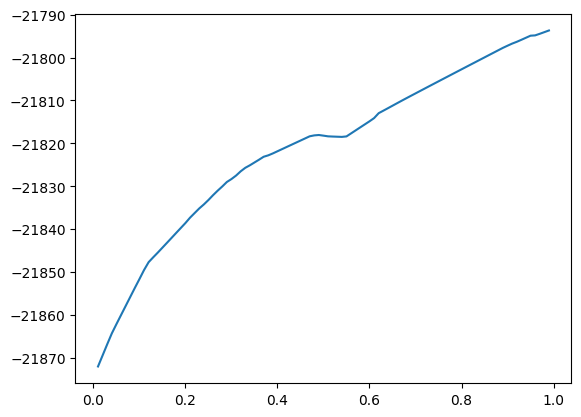

In [84]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [85]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-21793.692433


## Random Forest
Creates a random forest regressor (rf) and calculates the mean absolute error using cross-validation.

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-18498.5595332663

## Tune Models GridsearchCV
Performs hyperparameter tuning for the random forest model using GridSearchCV, trying different combinations of n_estimators, criterion, and max_features.

In [87]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('friedman_mse','absolute_error', 'poisson', 'squared_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=240)

## test ensembles
- Loads the pickle file and retrieves the model.
- Makes predictions using the loaded model on a sample test instance.
- Prints the list of features for the second instance in the test set.

In [88]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(f"tpred_lm: {mean_absolute_error(y_test,tpred_lm)}")
print(f"tpred_lml: {mean_absolute_error(y_test,tpred_lml)}")
print(f"tpred_rf: {mean_absolute_error(y_test,tpred_rf)}")

print(f"tpred_lm + tpred_rf: {mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)}")
print(f"tpred_lm + tpred_lml: {mean_absolute_error(y_test,(tpred_lm+tpred_lml)/2)}")
print(f"tpred_rf + tpred_lml: {mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)}")

tpred_lm: 5853906987121.6875
tpred_lml: 19986.087790537174
tpred_rf: 18671.250789988815
tpred_lm + tpred_rf: 2926953501291.46
tpred_lm + tpred_lml: 2926953503087.2886
tpred_rf + tpred_lml: 18338.657411207634


In [89]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [90]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [91]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([55736.0125])

In [92]:
list(X_test.iloc[0,:])

[19,
 True,
 True,
 4.1,
 24.0,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]